### Sifting through Stock Prices

In today's Python notebook, we will explore data related to the Tesla stock (`TSLA`). We will try to discover trends, highlight key facts, and plot data onto charts.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

In [3]:
style.use('ggplot')
yf.pdr_override()
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
df = web.get_data_yahoo("TSLA", '2015-01-01', '2023-03-22')
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

print(df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  14.858000  14.883333  14.217333  14.620667  14.620667  71466000
2015-01-05  14.303333  14.433333  13.810667  14.006000  14.006000  80527500
2015-01-06  14.004000  14.280000  13.614000  14.085333  14.085333  93928500
2015-01-07  14.223333  14.318667  13.985333  14.063333  14.063333  44526000
2015-01-08  14.187333  14.253333  14.000667  14.041333  14.041333  51637500


#### Creating our lists of data

The below code block is creating basic Python lists from our "data frame."

`dates` is a list containing `date` objects, in chronological order from `2015-01-02` to `2023-03-21`.
Assume that they **only** contain dates that were actual trading days.

`closingPrices` a list containing all of the stock prices for Tesla at the end of each trading day. The values are of type `float`. You can assume that they are in chronological order, starting from `2015-01-02` and ending `2023-03-21`.

`highPrices` is a list containing all of the maximum stock prices that `TSLA` hit on a particular day. The values are of type `float`, and again you can assume that they are in chronological order, starting from `2015-01-02` and ending `2023-03-21`. 

In [4]:
closingPrices = df.get('Close').tolist()
highPrices = df.get('High').tolist()
dates = list(df.index)

dates = [t.date() for t in dates]

(closingPrices, highPrices)

([14.620667457580566,
  14.005999565124512,
  14.085332870483398,
  14.063332557678223,
  14.041333198547363,
  13.77733325958252,
  13.480667114257812,
  13.616666793823242,
  12.845999717712402,
  12.791333198547363,
  12.871333122253418,
  12.795332908630371,
  13.104666709899902,
  13.441332817077637,
  13.419333457946777,
  13.770000457763672,
  13.732000350952148,
  13.291333198547363,
  13.680000305175781,
  13.573332786560059,
  14.062666893005371,
  14.557332992553711,
  14.569999694824219,
  14.732666969299316,
  14.490667343139648,
  14.498666763305664,
  14.419333457946777,
  14.186667442321777,
  13.525333404541016,
  13.584667205810547,
  13.623332977294922,
  13.630666732788086,
  14.11400032043457,
  14.473999977111816,
  13.822667121887207,
  13.607333183288574,
  13.583999633789062,
  13.812666893005371,
  13.555999755859375,
  13.155332565307617,
  13.303999900817871,
  13.496000289916992,
  13.375332832336426,
  12.925333023071289,
  12.725333213806152,
  12.6879997

### TODO - Quick Practice

Your first exercise is simple - output or print the **first** and **last** prices in our lists (from both the high prices and the closing prices). What do you notice?

In [5]:
print(highPrices[0])
print(highPrices[len(highPrices)-1])

14.883333206176758
198.0


In [6]:
print(closingPrices[0])
print(closingPrices[len(closingPrices)-1])

14.620667457580566
197.5800018310547


### TODO - Comparing High & Closing Prices

Write code to print out all of the dates on which the closing price *was* the highest price of the day.

In [7]:
for i in range(0, len(dates)):
    if highPrices[i] == highPrices[i]:
        print(dates[i])

2015-01-02
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-12
2015-01-13
2015-01-14
2015-01-15
2015-01-16
2015-01-20
2015-01-21
2015-01-22
2015-01-23
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-02-02
2015-02-03
2015-02-04
2015-02-05
2015-02-06
2015-02-09
2015-02-10
2015-02-11
2015-02-12
2015-02-13
2015-02-17
2015-02-18
2015-02-19
2015-02-20
2015-02-23
2015-02-24
2015-02-25
2015-02-26
2015-02-27
2015-03-02
2015-03-03
2015-03-04
2015-03-05
2015-03-06
2015-03-09
2015-03-10
2015-03-11
2015-03-12
2015-03-13
2015-03-16
2015-03-17
2015-03-18
2015-03-19
2015-03-20
2015-03-23
2015-03-24
2015-03-25
2015-03-26
2015-03-27
2015-03-30
2015-03-31
2015-04-01
2015-04-02
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-20
2015-04-21
2015-04-22
2015-04-23
2015-04-24
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-01
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-11
2015-05-12
2015-05-13

### Minimum and Maximum Closing Prices

Let's find out the **highest** and **lowest** closing prices of `TSLA` all-time, *as well as the dates on which they were reached*.

There is an *easy way*, and a *hard way* to find out the actual prices. There are *aggregate functions* you can perform on a list to get minimum and maximum values. You are welcome to try to figure out what they are.

You can also use a loop to find the minimum and maximum prices. You will *need* to use a loop to track the dates on which the prices were hit.

In [9]:
maxDate = ''
minDate = ''

currentMinimum = 9999999  # set this value to a really high number
currentMaximum = -999999 # set this value to a really low number

for i in range(0, len(dates)):
    closingPrice = closingPrices[i]
    
    if closingPrice > currentMaximum:
        currentMaximum = closingPrice
        maxDate = dates[i]
        
    if closingPrice < currentMinimum:
        currentMinimum = closingPrice
        minDate = dates[i]

### TODO - Percent Changes

Financial analysts do not always care about the raw change in price, but sometimes the **percent change** in price from day-to-day. Here is the formula for percent change:

$$
(\frac{closing_{curr}-closing_{prev}}{closing_{prev}}) \cdot 100
$$

Create a list that has each day-to-day percent change. You must start at the **second** value in our closing price list, and compare it with the **first value**. Then, move to the **third value** in our closing price list, and compare it with the **second**, and so on. You will need a loop!

In [10]:
## TODO - Build the Percent Change list here. Output your result!
percentChanges= []
for i in range (1, len(dates)):
    percentChange = ((closingPrices[i] - closingPrices[i-1]) / closingPrices[i-1]) * 100
    percentChanges.append(percentChange)
print(percentChanges)

[-4.204102817052719, 0.566423731415998, -0.156193062723272, -0.15643062581811937, -1.8801629106854019, -2.153291495060319, 1.008849772883938, -5.65973367623586, -0.42555285977208474, 0.6254228739435841, -0.5904610882275209, 2.4175518017267654, 2.5690550903015366, -0.16366947705445176, 2.6131476717216047, -0.27596300325537443, -3.2090528775309144, 2.924214605280501, -0.7797333058199228, 3.6051138960494487, 3.51758385028932, 0.08701251992371828, 1.1164535201252122, -1.6426056915829232, 0.05520394593698827, -0.5471765552931358, -1.6135698387415627, -4.661658846022322, 0.438686422691883, 0.28462803614236903, 0.05383231478953596, 3.5459277020091946, 2.550656429814802, -4.500019733692015, -1.557832050065554, -0.1714777553045302, 1.6833573717678696, -1.858201165163625, -2.9556447164922344, 1.130091807046442, 1.4431779204036055, -0.8940979178158315, -3.364400833280273, -1.5473474370690776, -0.2933792603862906, 1.796978608170632, -1.3781390917263956, -1.2508496633278083, 3.720588386927727, -0.4

### Plotting!

Let's take a quick break from constructing our own lists - and let's plot some of the data that we have!

There is a **widely used package** in the Data Science industry called `matplotlib` which takes in Python lists as inputs, as well as formatting configurations, and outputs pretty looking plots & charts.

If you look at one of the first code blocks in this notebook, I included the line:

`import matplotlib.pyplot as plt`

This imports the `pyplot` code which includes this functionality, but I *aliased* it as `plt` so that I wouldn't have to type out the entire `matplotlib.pyplot` every time I wanted to use a function from this package!

To plot a basic line chart, just type

`plt.plot([x values], [y values])`

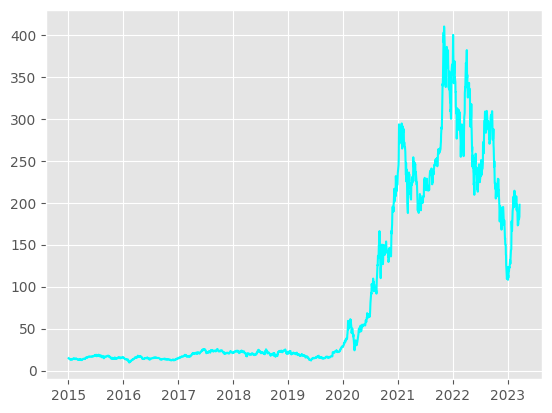

In [12]:
plt.plot(dates, closingPrices, color='cyan')

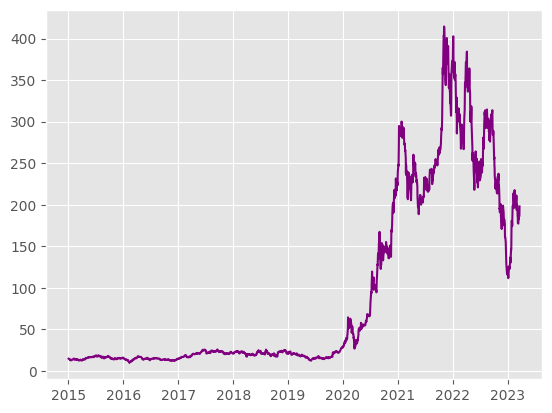

In [13]:
## TODO - Plot the Highest Prices of each day and compare the graph to the one above.
plt.plot(dates, highPrices, color='purple')

#### Plotting multiple lines into one chart.

You can plot multiple sets of `y` values by writing successive `plt.plot()` lines. Simply plot your first series of y-values, and then on the next line plot the other one.

`TODO` - In the next code block, try plotting the closing prices and the high prices together on the same plot. Set each to be a different color so that you can tell which is which. Do the graphs match closely?

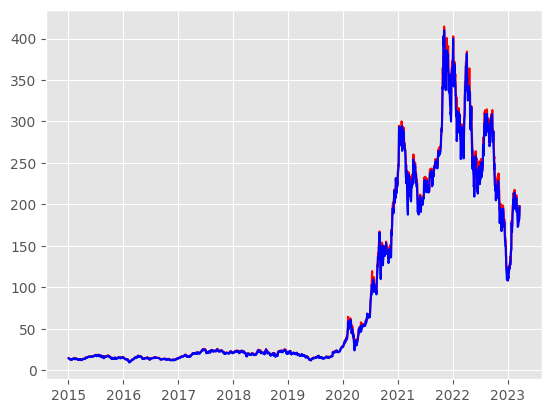

In [14]:
plt.plot(dates, highPrices, color = 'red')
plt.plot(dates, closingPrices, color = 'blue')

#### Adding Labels / Titles

You can also add a title to your plot and label the axes.

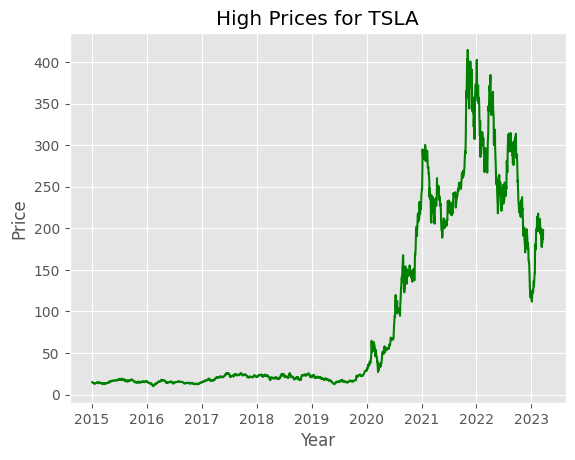

In [15]:
plt.title("High Prices for TSLA")
plt.xlabel("Year")
plt.ylabel("Price")
plt.plot(dates, highPrices, color = 'green')

#### Documentation

Matplotlib is a *very useful tool*. You do not need an extensive knowledge of Python to utilize its core functionalities. I'd encourage you to think about using it for other classes, e.g. a science lab report.

You can explore more of the functionality in Matplotlib's online documentation:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

Just by looking through this link, you can see that the `plt.plot` method has arguments for changing the markers and styles.

When working on these projects, you are always allowed to look through the documentation to enhance the plots you produce. We will explore more ways to use this throughout the rest of the quarter.

### 30-Day Averages and %-Changes

Financial analysts frequently look at the 30-Day average price of stocks when deciding to make a trade. Your first `TODO` is to create a list that has a rolling 30 day average of `TSLA` stock.

In [16]:
avg30DayPrice = []
for i in range(30, len(dates)-1):
    avg = sum(closingPrices[i-30:i])/30
    avg30DayPrice.append(avg)
    

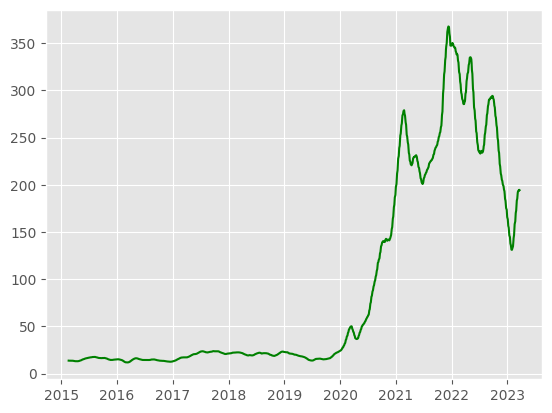

In [17]:
plt.plot(dates[31:], avg30DayPrice, color = 'green')

#### 30-Day Percent Change

Let's find out the 30-day period when TSLA experienced the largest percent increase AND decrease.

Reminder that the percent change can be calculated as:

$$
(\frac{closing_{curr}-closing_{curr-30}}{closing_{curr-30}}) \cdot 100
$$

Calculate this value for **every** 30 day period, starting at the difference between `closingPrices[30]-closingPrices[0]`, then `closingPrices[31]-closingPrices[1]`, and so on.

Keep track of the largest *positive* and *negative* percent changes that you find. Print out the *ending dates* on which you observe them. Did anything happen to Tesla during that time that could have caused the change?

In [18]:
largestPosChange = -99999
largestNegChange = 99999
posChangeDate = ''
negChangeDate = ''
posPercentChange = 0
negPercentChange = 0

for i in range(30, len(dates)-1):
    percentChange = ((closingPrices[i]-closingPrices[i-30])/closingPrices[i-30]) * 100
    if percentChange > largestPosChange:
        largestPosChange = percentChange
        posChangeDate = dates[i]
        posPercentChange = percentChange
    elif percentChange < largestNegChange:
        largestNegChange = percentChange
        negChangeDate = dates[i]
        negPercentChange = percentChange
        
print(f'The largest positive change ended on {posChangeDate} and was {posPercentChange} percent while the largest negative change ended')
print(f'on {negChangeDate} and was {negPercentChange} percent.')


The largest positive change ended on 2020-02-04 and was 119.54756128320317 percent while the largest negative change ended
on 2020-03-18 and was -59.278966478755 percent.


In [19]:
maxPrice = max(highPrices)
indexMaxPrice = highPrices.index(maxPrice)
print(dates[indexMaxPrice])

2021-11-04


In [22]:
#Random
def raisePower(a, b):
    return a ** b

def reverseString(a):
    return a[::-1]

print('Chose a function (1, 2)')
userChoice = input()

if userChoice == '1':
    print('Please give me two numbers and I will raise the first to the second power')
    inputOne = input()
    inputTwo = input()
    inputOne = int(inputOne)
    inputTwo = int(inputTwo)
    print(raisePower(inputOne, inputTwo))
elif userChoice == '2':
    print('Give me a string and I will reverse it')
    inputStr = input()
    print(reverseString(inputStr))

Chose a function (1, 2)
4


In [21]:
#random
print('Please provide me numbers and I will return the sum. Type \"stop" to stop inputs and return sum.')
end = "start"
num = []
while end == 'start':
    userInput = input()
    if userInput.lower() == 'stop':
        end = 'stop'
    else:
       num.append(int(userInput))
print(f'The sum is {sum(num)}')    

Please provide me numbers and I will return the sum. Type "stop" to stop inputs and return sum.
32
23
1313
123
stop
The sum is 1491
